Este trabalho foi realizado com a colaboração de **Andre de Carvalho Fiedler** em um projeto de iniciação científica

# Em construção
Estamos trabalhando para que os códigos a seguir funcionem on-line sem a necessidade de carregar os arquivos de microdados no computador do usuário. Contudo, por enquanto estas biblioteca funcionam apenas com os dados das respectivas fontes (RAIS, CNEFE, Censo IBGE) in loco e em formato específico. Me contate em `andre.morelli@usp.br` para mais detalhes sobre como rodar o código em sua máquina e o compartilhamento de arquivos necessários.

Sempre que me referir a `caminho_empregos` tenha em mente que esse é um caminho local na maquina em que o código roda e devem ser diferentes para cada usuário. Em linhas gerais, a pasta contém os shapefiles com as faces de logradouros e setores censitários das cidades brasileiras bem como os csvs de dados estatísticos do censo 2010 e as tabelas RAIS para estabelecimentos referentes aos anos a partir de 2014.

In [1]:
from tools.jobsBR import *
from tools.extract import *
import matplotlib.pyplot as plt

In [2]:
caminho_empregos = 'Seu caminho aqui'

In [3]:
from glob import glob
glob('G:\\My Drive\\Base Para IC - Andre+Gerardo\\Census_Tracts_Geographic_Data\\*\\35*.shp')

['G:\\My Drive\\Base Para IC - Andre+Gerardo\\Census_Tracts_Geographic_Data\\sp_setores_censitarios\\35SEE250GC_SIR.shp']

In [4]:
# A biblioteca de dados demográficos trabalha a partir do código IBGE da cidade
# Utilizaremos São Carlos-SP, código IBGE 3548906 como exemplo

cod = '3548906' #São Carlos-SP
gdf = fetch_demographic_data(cod, caminho_empregos, income=True,
                             sex=True)
#Projeta o dataframe para epsg4326 e filtra ditritos afastados
gdf = gdf[(gdf['TIPO']=='URBANO') & 
          ~(gdf['NM_DISTRIT'].isin(['ÁGUA VERMELHA', 'SANTA EUDÓXIA']))].to_crs('epsg:4326')

gdf.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,...,Renda_de_1_a_2_salarios_minimos,Renda_de_2_a_3_salarios_minimos,Renda_de_3_a_5_salarios_minimos,Renda_de_5_a_10_salarios_minimos,Renda_de_10_a_15_salarios_minimos,Renda_de_15_a_20_salarios_minimos,Renda_maior_20_salarios_minimos,Sem_renda,Homens,Mulheres
0,106332.0,354890605000001,URBANO,35489060500,None,354890605,SÃO CARLOS,3548906,SÃO CARLOS,SÃO CARLOS,...,52.0,36.0,47.0,61.0,29.0,20.0,16.0,92.0,170,216
1,106333.0,354890605000002,URBANO,35489060500,None,354890605,SÃO CARLOS,3548906,SÃO CARLOS,SÃO CARLOS,...,50.0,26.0,46.0,27.0,10.0,4.0,5.0,47.0,109,141
2,106334.0,354890605000003,URBANO,35489060500,None,354890605,SÃO CARLOS,3548906,SÃO CARLOS,SÃO CARLOS,...,20.0,13.0,21.0,21.0,10.0,8.0,3.0,26.0,56,78
3,106335.0,354890605000004,URBANO,35489060500,None,354890605,SÃO CARLOS,3548906,SÃO CARLOS,SÃO CARLOS,...,29.0,29.0,39.0,44.0,13.0,11.0,18.0,65.0,119,160
4,106336.0,354890605000005,URBANO,35489060500,None,354890605,SÃO CARLOS,3548906,SÃO CARLOS,SÃO CARLOS,...,42.0,36.0,56.0,68.0,14.0,17.0,8.0,77.0,154,211


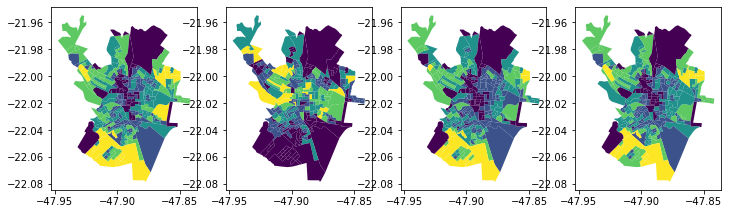

In [5]:
# proporção homens/mulheres
fig, axs = plt.subplots(nrows=1,ncols=4, figsize=(12,6))
gdf.plot(column='Pessoas',ax=axs[0], scheme='fisherjenks')
gdf.plot(column='Renda_de_5_a_10_salarios_minimos',ax=axs[1], scheme='fisherjenks')
gdf.plot(column='Sem_renda',ax=axs[2], scheme='fisherjenks')
gdf.plot(column='Homens', ax=axs[3], scheme='fisherjenks')
plt.show()

In [6]:
#read RAIS table for 2019:
df = pd.read_csv(path+'/2019/RAIS_ESTAB_PUB.txt',
                 encoding='latin-1',sep=';')
jobs = get_jobs_in_region(gdf, cod[:2], df, path = caminho_empregos,
                          convex_hull=True, separate=True)

C:\Users\Andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:>

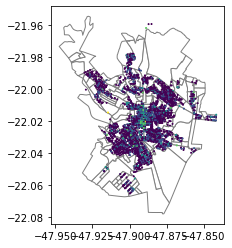

In [11]:
ax = gdf.plot(color='w', edgecolor='grey')
jobs.plot(column='jobs', scheme='fisherjenks', markersize=1, ax=ax)

In [13]:
# Adicionando os empregos aos setores censitários
joined = gpd.sjoin(gdf,jobs)
js = []
for zid in gdf['ID']:
    js.append(joined[joined['ID']==zid]['jobs'].sum())
gdf['jobs'] = js

<AxesSubplot:>

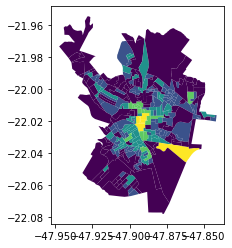

In [14]:
gdf.plot(column='jobs', scheme='fisherjenks')